In [1]:
import torch
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
import torch.nn.functional as F
def compute_correlation_matrix(model, tokenizer, token_list):
    model = model.eval()
    #token_list = text.strip('\n').split()
    #token_list = tokenizer.tokenize(text.strip('\n'))
    input_ids = torch.LongTensor(tokenizer.convert_tokens_to_ids(token_list)).view(1,-1)
    _, seq_len = input_ids.size()
    hidden = model(input_ids).last_hidden_state
    #print (hidden.size())
    norm_hidden = hidden / hidden.norm(dim=2, keepdim=True)
    correlation_matrix = torch.matmul(norm_hidden, norm_hidden.transpose(1,2)).view(seq_len, seq_len)
    correlation_matrix = F.softmax(correlation_matrix, dim=-1)
    #print (correlation_matrix.size())
    return correlation_matrix.detach().numpy()

In [3]:
def plot_heatmap(matrix, token_list):
    #token_list = text.strip('\n').split()
    x_ticks = token_list
    y_ticks = token_list
    
    fig, ax = plt.subplots()
    im = ax.imshow(matrix)

    ax.set_xticks(np.arange(len(x_ticks)))
    ax.set_yticks(np.arange(len(x_ticks)))
    ax.set_xticklabels(x_ticks)
    ax.set_yticklabels(x_ticks)

    plt.setp(ax.get_xticklabels(), rotation=90, ha="right",
             rotation_mode="anchor")

    fig.tight_layout()
    plt.show()

In [4]:
def visualize_instance(model, tokenizer, text):
    text = '[CLS] ' + text.strip('\n') + ' [SEP]'
    text = tokenizer.convert_tokens_to_string(text.split())
    token_list = tokenizer.tokenize(text)
    print (token_list)
    correlation_matrix = compute_correlation_matrix(model, tokenizer, token_list)
    plot_heatmap(correlation_matrix, token_list)

# load sampled wiki sentences

In [5]:
in_f = r'../pretraining_data/example_data/english_data_500_lines.txt'
with open(in_f, 'r', encoding = 'utf8') as i:
    lines = i.readlines()

In [6]:
idx = 10
text = lines[idx].strip('\n')

In [7]:
from transformers import BertModel, BertTokenizer

# load bert base model

In [8]:
model_name = 'bert-base-uncased'
bert_model = BertModel.from_pretrained(model_name)
tokenizer = BertTokenizer.from_pretrained(model_name)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


# load clbert model

In [9]:
model_name = 'cambridgeltl/clbert-base-uncased'
clbert_model = BertModel.from_pretrained(model_name)
cl_tokenizer = BertTokenizer.from_pretrained(model_name)

# select a text

In [10]:
idx = 10
text = lines[idx].strip('\n')
print (text)

now it serves as the folk custom museum in yang ##li ##u ##qing , which has a large collection of folk custom museum in yan ##li ##u ##qing , which has a large collection of folk art pieces like yan ##li ##u ##qing new year pictures , brick sculpture .


# bert base model result

['[CLS]', 'now', 'it', 'serves', 'as', 'the', 'folk', 'custom', 'museum', 'in', 'yang', '##li', '##u', '##qing', ',', 'which', 'has', 'a', 'large', 'collection', 'of', 'folk', 'custom', 'museum', 'in', 'yan', '##li', '##u', '##qing', ',', 'which', 'has', 'a', 'large', 'collection', 'of', 'folk', 'art', 'pieces', 'like', 'yan', '##li', '##u', '##qing', 'new', 'year', 'pictures', ',', 'brick', 'sculpture', '.', '[SEP]']


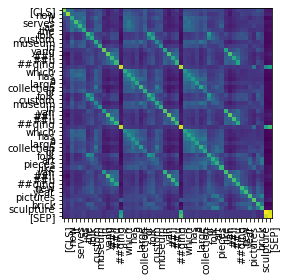

In [11]:
visualize_instance(bert_model, tokenizer, text)

# clbert base model result

['[CLS]', 'now', 'it', 'serves', 'as', 'the', 'folk', 'custom', 'museum', 'in', 'yang', '##li', '##u', '##qing', ',', 'which', 'has', 'a', 'large', 'collection', 'of', 'folk', 'custom', 'museum', 'in', 'yan', '##li', '##u', '##qing', ',', 'which', 'has', 'a', 'large', 'collection', 'of', 'folk', 'art', 'pieces', 'like', 'yan', '##li', '##u', '##qing', 'new', 'year', 'pictures', ',', 'brick', 'sculpture', '.', '[SEP]']


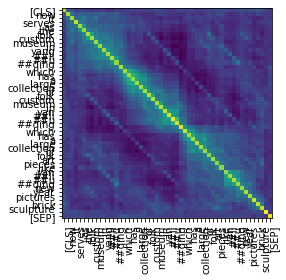

In [12]:
visualize_instance(clbert_model, cl_tokenizer, text)